In [3]:
import json
import numpy as np
f1 = open(f'../embeddings/high_dim/allenai_specter_high_dim.json')
f2 = open(f'../embeddings/high_dim/all_mpnet_base_v2_high_dim.json')
f3 = open(f'../embeddings/high_dim/s_pubmedbert_ms_marco_high_dim.json')
f4 = open(f'../embeddings/high_dim/biowordvec_high_dim.json')
f5 = open(f'../embeddings/high_dim/bow_high_dim.json')
f6 = open(f'../embeddings/high_dim/tfidf_high_dim.json')

data1 = json.load(f1)
data2 = json.load(f2)
data3 = json.load(f3)
data4 = json.load(f4)
data5 = json.load(f5)
data6 = json.load(f6)
article_title = data1.keys()

biowordvec = []
titles_data1 = data1.keys()
titles_data4 = data4.keys()
print(len(titles_data4))
for title in titles_data1:
   for t in titles_data4:
        if title.replace('/','-') == t:
             biowordvec.append(data4[t])


print(len(biowordvec))
data1 = specter = np.array(list(data1.values()))
data2 = np.array(list(data2.values()))
# data3 = np.array(list(data3.values()))
data3 = np.array(list(data3.values()))
data5 = np.array(list(data5.values()))
data6 = np.array(list(data6.values()))
combined = [data1, data2, data3, biowordvec, data5, data6]



236
236


In [4]:
import umap
import hdbscan
umap_embeddings = umap.UMAP(n_neighbors=5,
                                n_components=10,
                                metric='cosine').fit_transform(specter)

cluster = hdbscan.HDBSCAN(min_cluster_size=3,
                              metric='euclidean',
                              cluster_selection_method='eom').fit(umap_embeddings)
labels = cluster.labels_

In [5]:
relation_dict = {i:i for i in range(236)}
# targets = list(relation_dict_titles[0].keys())
relation_dicts = [relation_dict.copy() for i in range(len(combined) - 1)]
relation_dicts

[{0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59,
  60: 60,
  61: 61,
  62: 62,
  63: 63,
  64: 64,
  65: 65,
  66: 66,
  67: 67,
  68: 68,
  69: 69,
  70: 70,
  71: 71,
  72: 72,
  73: 73,
  74: 74,
  75: 75,
  76: 76,
  77: 77,
  78: 78,
  79: 79,
  80: 80,
  81: 81,
  82: 82,
  83: 83,
  84: 84,
  85: 85,
  86: 86,
  87: 87,
  88: 88,
  89: 89,
  90: 90,
  91: 91,
  92: 92,
  93: 93,
  94: 94,
  95: 95,
  96: 96,
  97: 97,
  98: 98,
  99: 99,
  100: 100,
  101: 1

In [6]:
import hdbscan
import umap


aligned_mapper = umap.AlignedUMAP(n_neighbors=5, n_components=2, metric='cosine', random_state=42).fit(combined, relations=relation_dicts)

# cluster = hdbscan.HDBSCAN(min_cluster_size=3,
#                               metric='euclidean',
#                               cluster_selection_method='eom').fit(aligned_mapper)

In [9]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

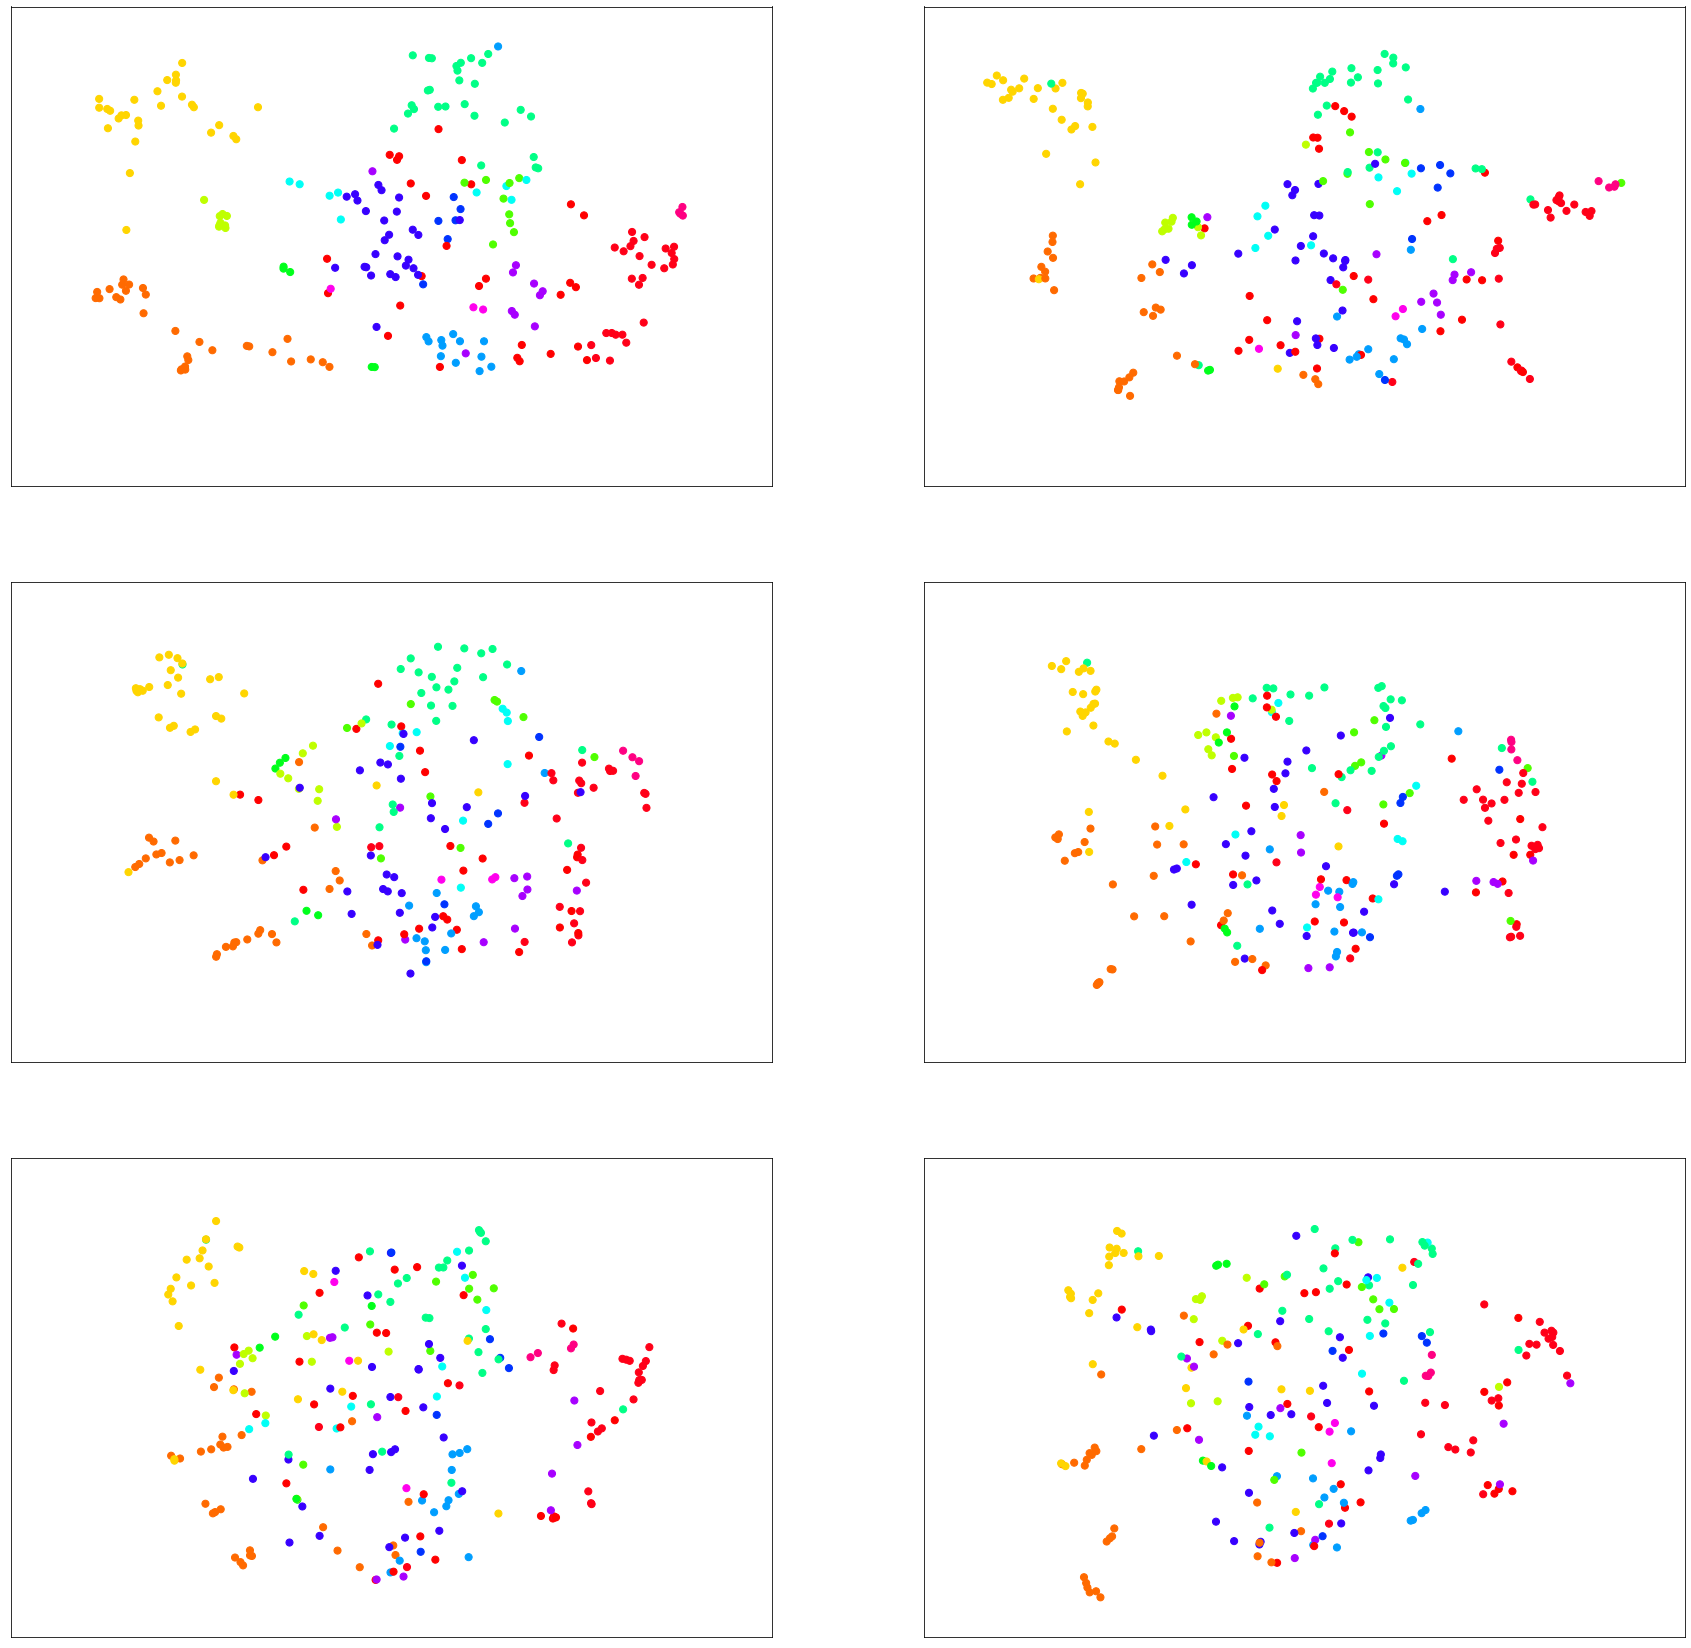

In [12]:
from matplotlib import pyplot as plt
import mplcursors


fig, axs = plt.subplots(3,2, figsize=(30, 30))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
     current_target = labels
     ax.scatter(*aligned_mapper.embeddings_[i].T, s=50, cmap="hsv", c=current_target)
     cursor = mplcursors.cursor(ax, hover=True)
     ax.axis(ax_bound)
     ax.set(xticks=[], yticks=[])
plt.show()